In [0]:
import pandas as pd
from pathlib import Path
import jieba

In [104]:
!git clone https://github.com/ljyslyc/comment-analysis.git

Cloning into 'comment-analysis'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 102 (delta 7), reused 12 (delta 5), pack-reused 83
Receiving objects: 100% (102/102), 82.47 MiB | 40.29 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [0]:
mypath = Path("comment-analysis/lstm-keras-demo/")
df = pd.read_csv(mypath/'CommentOfSentiment_datas.csv')

In [110]:
df.head()

,comment,sentiment
0,个人吃加了个羊腿不错的一家西餐厅还会光顾,1
1,我和男朋友是秀玉的老顾客了第一次认识就是在秀玉吃的饭他们家的环境优雅菜品味道也挺不错今天和男...,1
2,每次来秀玉觉得心情很好因为环境不错东西又很好吃因为没有拍照的习惯只能拿朋友做的东西来凑了貌似...,1
3,和室友一起来的这里位置很好找整个装饰也很有格调适合人们休息点了香辣咖喱鸡焗饭冰淇淋水果圣代奶...,1
4,还不错吧环境优雅菜品种类多味道还可以,1


In [54]:
!pip install jieba

In [0]:
df['text'] = df.comment.apply(lambda x: " ".join(jieba.cut(x)))

In [57]:
df.head()

,comment,sentiment,text
0,个人吃加了个羊腿不错的一家西餐厅还会光顾,1,个人 吃加 了 个 羊腿 不错 的 一家 西餐厅 还会 光顾
1,我和男朋友是秀玉的老顾客了第一次认识就是在秀玉吃的饭他们家的环境优雅菜品味道也挺不错今天和男...,1,我 和 男朋友 是秀玉 的 老 顾客 了 第一次 认识 就是 在秀玉 吃 的 饭 他们 家 ...
2,每次来秀玉觉得心情很好因为环境不错东西又很好吃因为没有拍照的习惯只能拿朋友做的东西来凑了貌似...,1,每次 来秀玉 觉得 心情 很 好 因为 环境 不错 东西 又 很 好吃 因为 没有 拍照 的...
3,和室友一起来的这里位置很好找整个装饰也很有格调适合人们休息点了香辣咖喱鸡焗饭冰淇淋水果圣代奶...,1,和 室友 一 起来 的 这里 位置 很 好找 整个 装饰 也 很 有 格调 适合 人们 休息...
4,还不错吧环境优雅菜品种类多味道还可以,1,还 不错 吧 环境 优雅 菜品 种类 多 味道 还 可以


In [0]:
df = df[['text', 'sentiment']]

In [59]:
df.head()

,text,sentiment
0,个人 吃加 了 个 羊腿 不错 的 一家 西餐厅 还会 光顾,1
1,我 和 男朋友 是秀玉 的 老 顾客 了 第一次 认识 就是 在秀玉 吃 的 饭 他们 家 ...,1
2,每次 来秀玉 觉得 心情 很 好 因为 环境 不错 东西 又 很 好吃 因为 没有 拍照 的...,1
3,和 室友 一 起来 的 这里 位置 很 好找 整个 装饰 也 很 有 格调 适合 人们 休息...,1
4,还 不错 吧 环境 优雅 菜品 种类 多 味道 还 可以,1


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import numpy as np

In [0]:
maxlen = 100
max_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.text)
sequences = tokenizer.texts_to_sequences(df.text)

In [63]:
type(sequences)

list

In [0]:
# sequences[:1]

In [65]:
for sequence in sequences[:5]:
  print(len(sequence))

11
51
53
68
11


In [0]:
data = pad_sequences(sequences, maxlen=maxlen)

In [67]:
data

array([[  0,   0,   0, ..., 543,  62, 220],
       [  0,   0,   0, ...,  89, 143, 249],
       [  0,   0,   0, ...,  77,   5,   1],
       ...,
       [  0,   0,   0, ..., 125, 125,   4],
       [  0,   0,   0, ...,  42,   1,   4],
       [  0,   0,   0, ...,  29,  12,   1]], dtype=int32)

In [0]:
word_index = tokenizer.word_index

In [69]:
type(word_index)

dict

In [70]:
print(word_index)

{'的': 1, '很': 2, '了': 3, '好': 4, '不错': 5, '也': 6, '吃': 7, '还': 8, '环境': 9, '味道': 10, '都': 11, '去': 12, '服务': 13, '好吃': 14, '是': 15, '可以': 16, '人': 17, '就是': 18, '喜欢': 19, '来': 20, '牛排': 21, '我': 22, '和': 23, '不': 24, '挺': 25, '还是': 26, '就': 27, '服务员': 28, '下次': 29, '团购': 30, '多': 31, '有点': 32, '非常': 33, '划算': 34, '感觉': 35, '有': 36, '上菜': 37, '服务态度': 38, '比较': 39, '秀玉': 40, '没有': 41, '吧': 42, '再': 43, '两个': 44, '东西': 45, '披萨': 46, '点': 47, '等': 48, '经常': 49, '没': 50, '口味': 51, '在': 52, '煲仔饭': 53, '特别': 54, '每次': 55, '啊': 56, '蛮': 57, '一般': 58, '菜品': 59, '多次': 60, '朋友': 61, '还会': 62, '哦': 63, '上': 64, '套餐': 65, '一直': 66, '一个': 67, '实惠': 68, '说': 69, '不过': 70, '分量': 71, '水果': 72, '但是': 73, '满意': 74, '一如既往': 75, '很多': 76, '会': 77, '我们': 78, '速度': 79, '价格': 80, '光谷': 81, '不是': 82, '时候': 83, '真的': 84, '以后': 85, '希望': 86, '啦': 87, '要': 88, '牛蛙': 89, '沙拉': 90, '菜': 91, '得': 92, '一起': 93, '态度': 94, '这个': 95, '以前': 96, '推荐': 97, '觉得': 98, '给': 99, '完': 100, '牛扒': 101, '才': 102, '行': 103, '又': 10

In [0]:
labels = np.array(df.sentiment)

In [72]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [74]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [76]:
training_samples

15976

In [77]:
validation_samples

3995

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [79]:
X_train

array([[   0,    0,    0, ...,  218,    1,  117],
       [   0,    0,    0, ...,   12,  230,    7],
       [   0,    0,    0, ..., 2538,    3,  892],
       ...,
       [   0,    0,    0, ...,   13,    8,  103],
       [   0,    0,    0, ...,   15,  652,    3],
       [   0,    0,    0, ...,   10,    6,   16]], dtype=int32)

In [80]:
!pip install gensim

In [0]:
from gensim.models import KeyedVectors

In [0]:
myzip = mypath / 'zh.zip'

In [83]:
!unzip $myzip

Archive:  demo-chinese-text-classification-lstm-keras/zh.zip
replace zh.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [84]:
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [85]:
zh_model.vectors[0]

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [86]:
list(iter(zh_model.vocab))[:5]

['的', '</s>', '在', '是', '年']

In [87]:
len(zh_model[next(iter(zh_model.vocab))])

300

In [0]:
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])

In [0]:
embedding_matrix = np.random.rand(max_words, embedding_dim)

In [90]:
embedding_matrix

array([[0.10096978, 0.67909743, 0.01540477, ..., 0.96821313, 0.8997202 ,
        0.53455551],
       [0.92462815, 0.87769633, 0.44883093, ..., 0.66560669, 0.6395022 ,
        0.61931309],
       [0.80058388, 0.80032268, 0.58832637, ..., 0.76733211, 0.86950337,
        0.97740511],
       ...,
       [0.95043286, 0.68428122, 0.91012023, ..., 0.32643362, 0.31964501,
        0.35005421],
       [0.16171337, 0.38211273, 0.77896459, ..., 0.61803723, 0.91497555,
        0.19375431],
       [0.63701492, 0.56774793, 0.08756047, ..., 0.79901796, 0.25147198,
        0.27901911]])

In [0]:
embedding_matrix = (embedding_matrix - 0.5) * 2

In [92]:
embedding_matrix

array([[-0.79806043,  0.35819486, -0.96919045, ...,  0.93642627,
         0.79944041,  0.06911102],
       [ 0.8492563 ,  0.75539265, -0.10233814, ...,  0.33121337,
         0.27900439,  0.23862619],
       [ 0.60116776,  0.60064536,  0.17665274, ...,  0.53466422,
         0.73900675,  0.95481022],
       ...,
       [ 0.90086572,  0.36856245,  0.82024046, ..., -0.34713275,
        -0.36070997, -0.29989159],
       [-0.67657327, -0.23577455,  0.55792917, ...,  0.23607445,
         0.82995109, -0.61249139],
       [ 0.27402983,  0.13549586, -0.82487907, ...,  0.59803592,
        -0.49705605, -0.44196177]])

In [0]:
#zh_model.get_vector('的')

In [0]:
for word, i in word_index.items():
    if i < max_words:
        try:
          embedding_vector = zh_model.get_vector(word)
          embedding_matrix[i] = embedding_vector
        except:
          pass
            

In [95]:
embedding_matrix

array([[-0.79806043,  0.35819486, -0.96919045, ...,  0.93642627,
         0.79944041,  0.06911102],
       [ 0.086988  ,  0.091123  ,  0.030722  , ...,  0.1095    ,
        -0.053695  ,  0.033823  ],
       [-0.15466   ,  0.057417  ,  0.11279   , ...,  0.28850999,
         0.22706001, -0.02122   ],
       ...,
       [ 0.18179999,  0.098471  ,  0.13163   , ..., -0.12331   ,
        -0.023334  ,  0.086613  ],
       [-0.023728  , -0.013159  , -0.077545  , ..., -0.25961   ,
        -0.27213001, -0.14347   ],
       [ 0.27402983,  0.13549586, -0.82487907, ...,  0.59803592,
        -0.49705605, -0.44196177]])

In [96]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM
from keras.optimizers import Adam

units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))

# 隐藏层32
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
# 隐藏层32
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(LSTM(units))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
dense_4 (Dense)              (None, None, 32)          9632      
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 32)          1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)               

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [100]:
# 使用高效的 ADAM 优化算法以，二分类损失函数binary_crossentropy，多分类的损失函数categorical_crossentropy
model.compile( optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
#模型持久化
model.save(mypath/"mymodel.h5")

Train on 15976 samples, validate on 3995 samples
Epoch 1/10
15976/15976 [==============================] - 41s 3ms/step - loss: 0.1066 - acc: 0.9671 - val_loss: 0.1075 - val_acc: 0.9697
Epoch 2/10
15976/15976 [==============================] - 38s 2ms/step - loss: 0.1036 - acc: 0.9675 - val_loss: 0.1063 - val_acc: 0.9690
Epoch 3/10
15976/15976 [==============================] - 37s 2ms/step - loss: 0.1011 - acc: 0.9683 - val_loss: 0.1270 - val_acc: 0.9687
Epoch 4/10
15976/15976 [==============================] - 37s 2ms/step - loss: 0.0956 - acc: 0.9687 - val_loss: 0.1069 - val_acc: 0.9662
Epoch 5/10
15976/15976 [==============================] - 37s 2ms/step - loss: 0.0926 - acc: 0.9697 - val_loss: 0.1067 - val_acc: 0.9655
Epoch 6/10
15976/15976 [==============================] - 37s 2ms/step - loss: 0.0881 - acc: 0.9710 - val_loss: 0.1360 - val_acc: 0.9442
Epoch 7/10
15976/15976 [==============================] - 38s 2ms/step - loss: 0.0874 - acc: 0.9700 - val_loss: 0.1125 - val_acc:

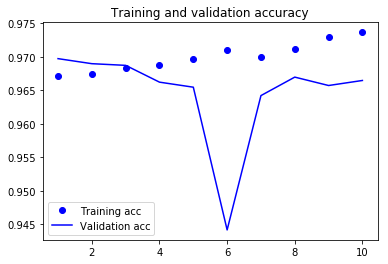

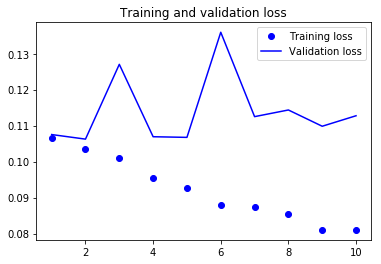

In [101]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()